Data set taken from kaggle https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [1]:
import os
import cv2 as cv

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras.utils as image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
training_path = r"C:\Users\user\Downloads\archive (5)2\training_set\training_set"
test_path = r"C:\Users\user\Downloads\archive (5)2\test_set\test_set"

In [3]:
def plot_image(path, int_type):
    _path = path
    label = None
    if int_type == 0:
        _path = _path + "/" + "cats"
        label = 0
    else:
        _path = _path + "/" + "dogs"
        label = 1
    
    plt.figure(figsize=(30, 30))
    plt.subplots_adjust(top=None, bottom=None, left=None, right=None, wspace=0.2, hspace=0.5)
    lst_img_name = os.listdir(_path)
    for i in range(1, 17, 1):
        th = np.random.randint(0, len(lst_img_name) - 1)
        plt.subplot(4, 4, i)
        img = _path + "/" + lst_img_name[th]
        img = cv.imread(img)
        plt.imshow(img)
        if label == 0:
            plt.title("Cat")
        else:
            plt.title("Dog")

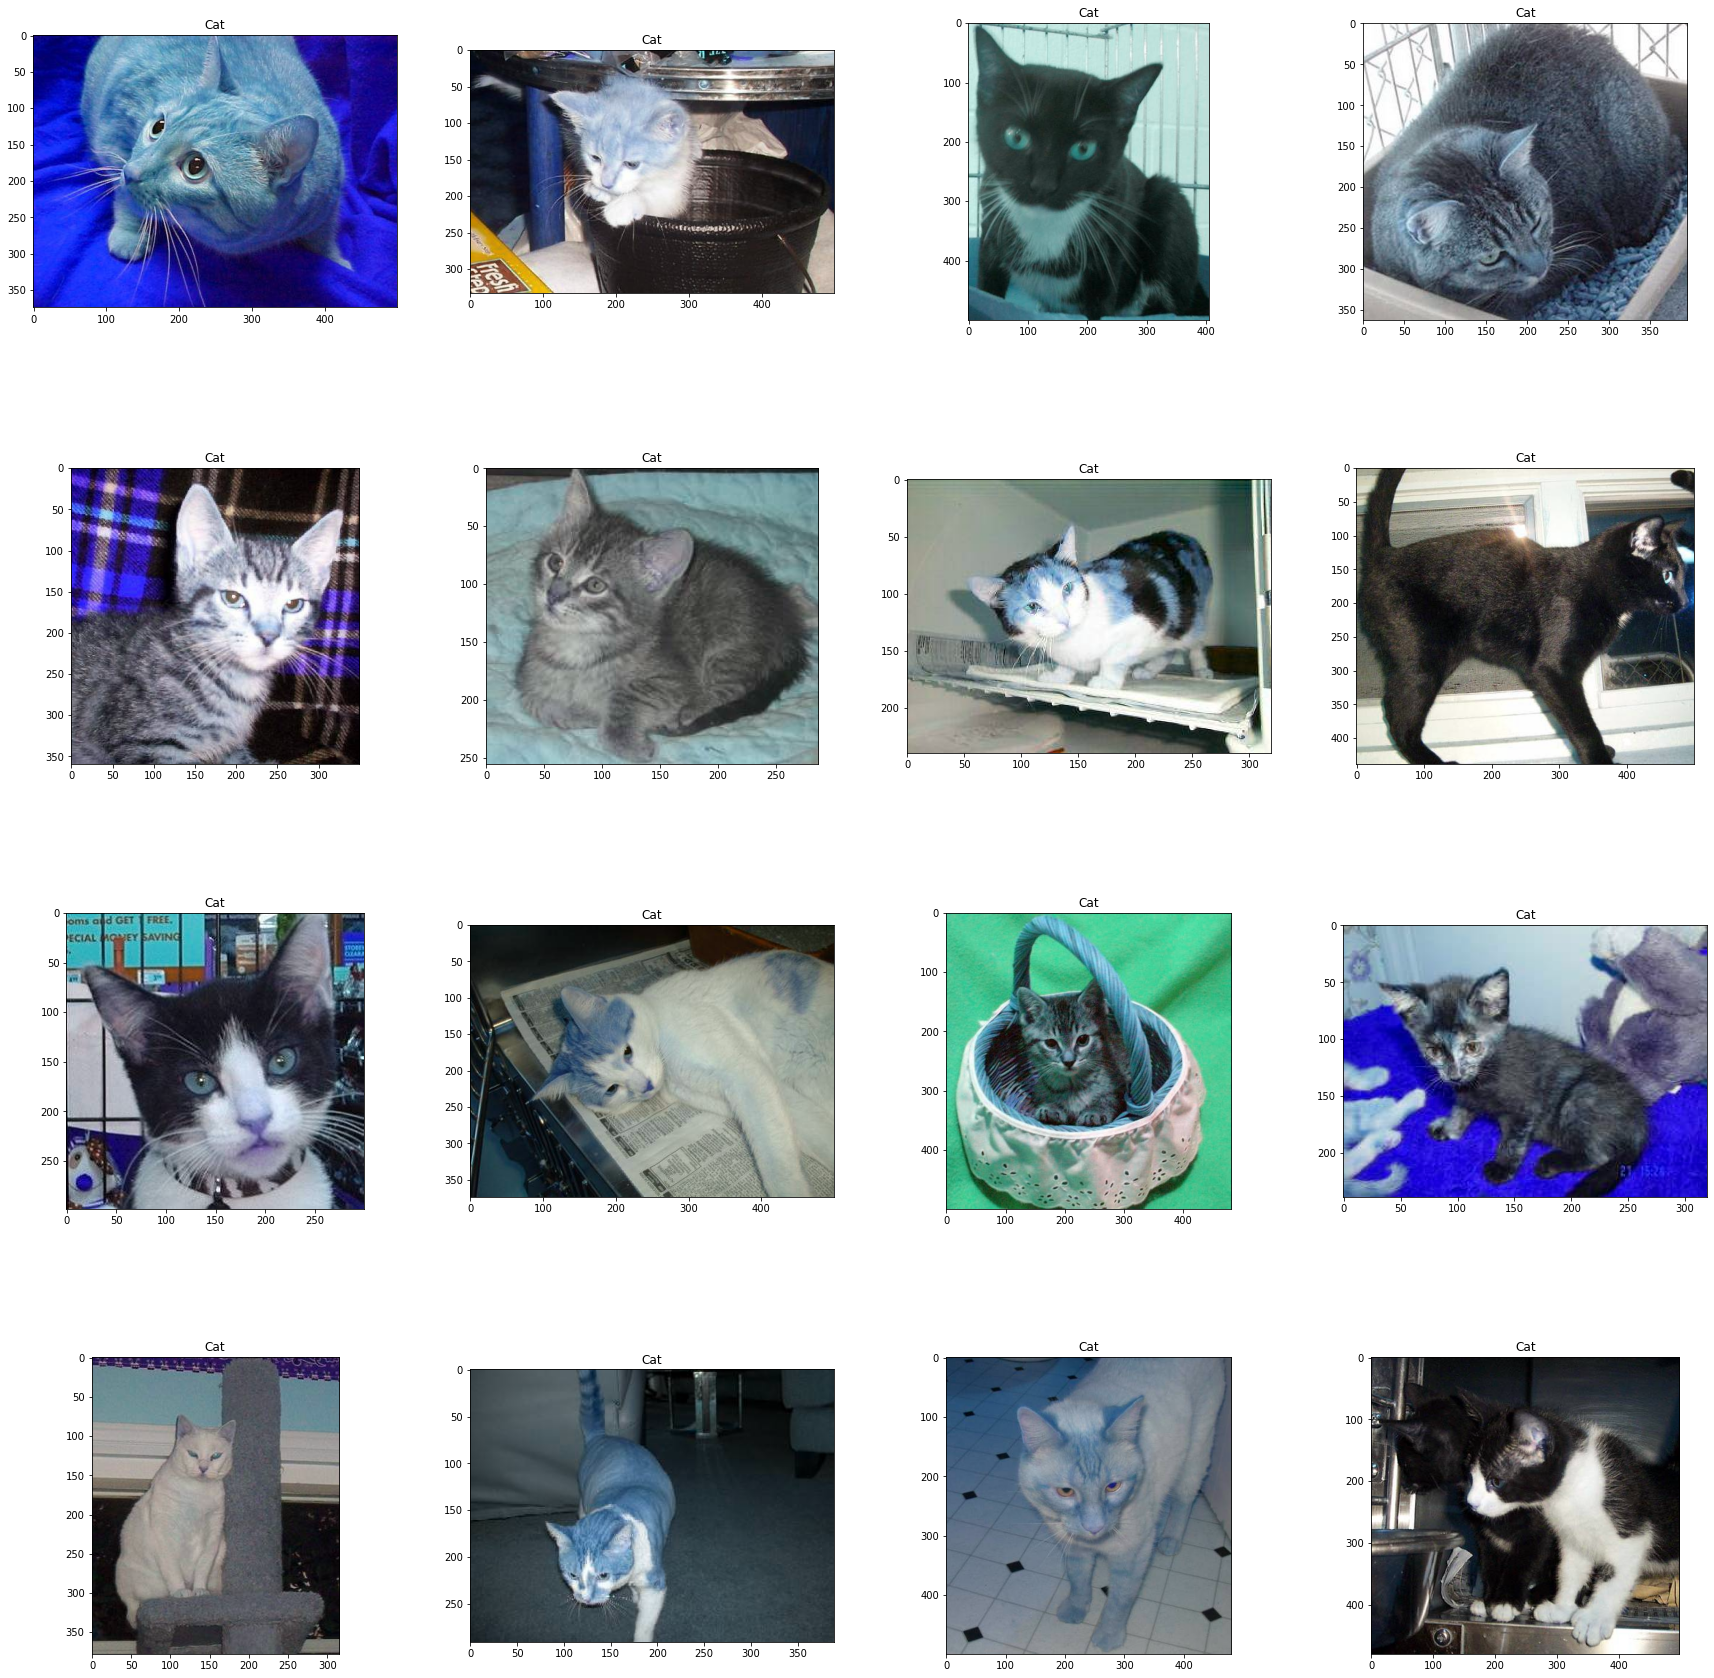

In [4]:
#Cats in the train dataset.
plot_image(training_path, 0)

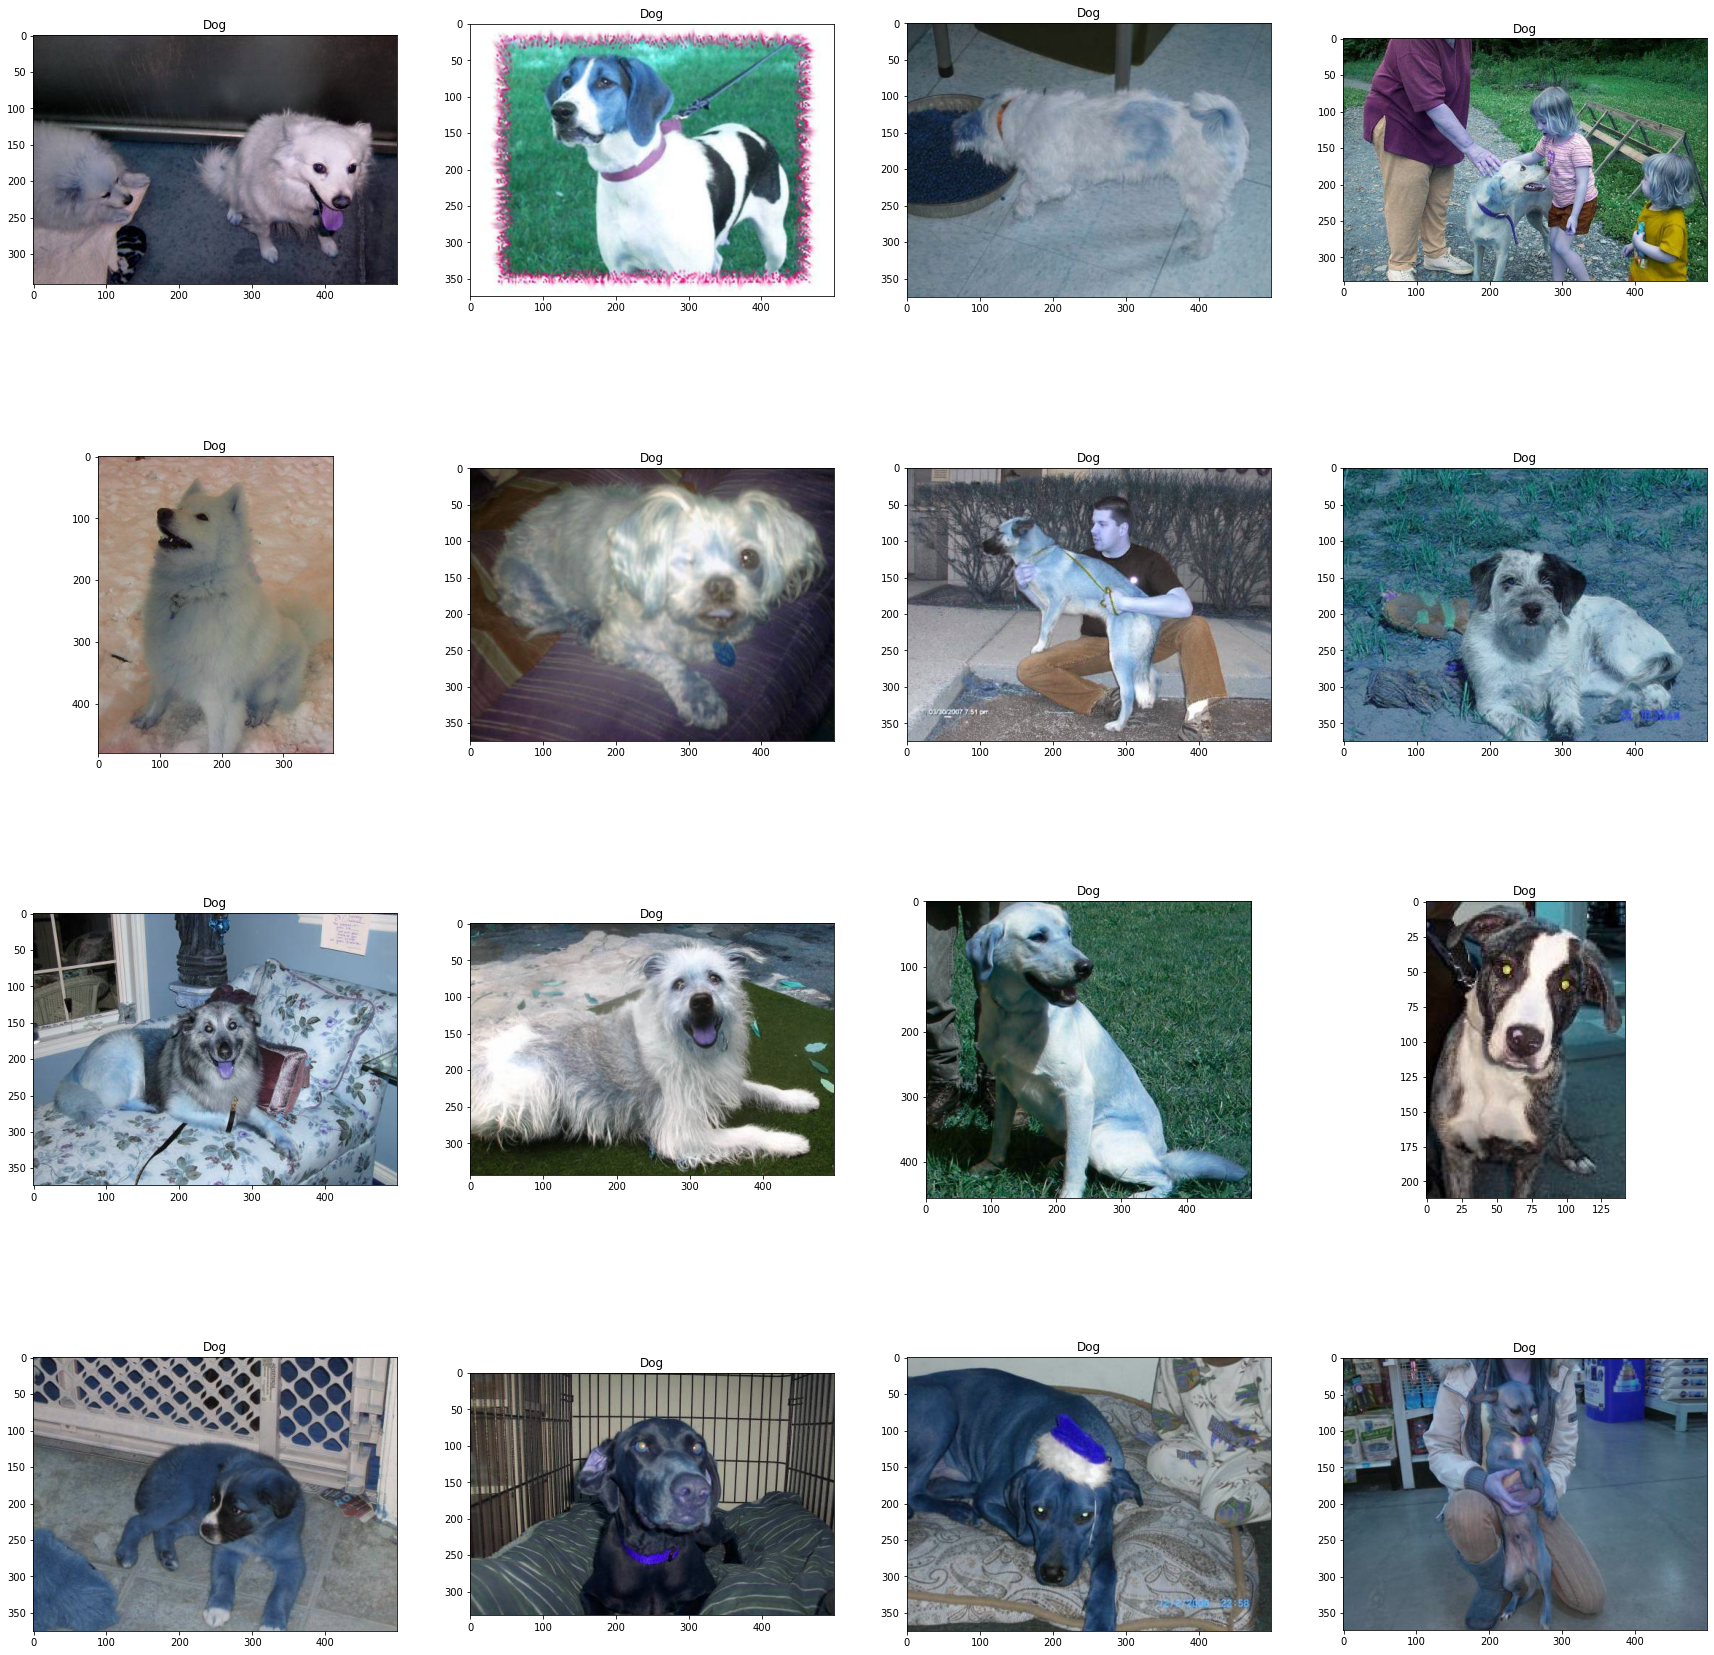

In [5]:
#dogs
plot_image(training_path, 1)

In [6]:
# Data Augmentation
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

In [7]:
train_data=train_data.flow_from_directory(
            directory=training_path, 
            batch_size=32, 
            target_size=(48,48), 
            class_mode='categorical')

test_data=test_data.flow_from_directory(
            directory=test_path, 
            batch_size=32, 
            target_size=(48,48), 
            class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [10]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                    

In [11]:
model_info = model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
251/251 [==============================] - 98s 383ms/step - loss: 0.6960 - accuracy: 0.5048 - val_loss: 0.6924 - val_accuracy: 0.5388
Epoch 2/15
251/251 [==============================] - 30s 120ms/step - loss: 0.6923 - accuracy: 0.5186 - val_loss: 0.6910 - val_accuracy: 0.5848
Epoch 3/15
251/251 [==============================] - 29s 113ms/step - loss: 0.6910 - accuracy: 0.5283 - val_loss: 0.6893 - val_accuracy: 0.5630
Epoch 4/15
251/251 [==============================] - 28s 113ms/step - loss: 0.6864 - accuracy: 0.5584 - val_loss: 0.6814 - val_accuracy: 0.6278
Epoch 5/15
251/251 [==============================] - 29s 114ms/step - loss: 0.6754 - accuracy: 0.5853 - val_loss: 0.6681 - val_accuracy: 0.6080
Epoch 6/15
251/251 [==============================] - 28s 112ms/step - loss: 0.6580 - accuracy: 0.6114 - val_loss: 0.6432 - val_accuracy: 0.6520
Epoch 7/15
251/251 [==============================] - 28s 113ms/step - loss: 0.6421 - accuracy: 0.6346 - val_loss: 0.6376 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

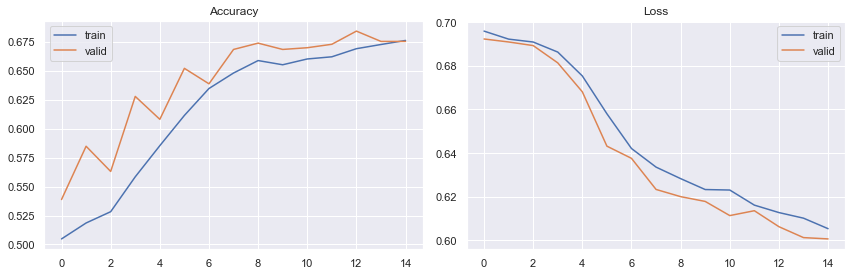

In [12]:
from matplotlib import pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(model_info.epoch, model_info.history['accuracy'], label='train')
sns.lineplot(model_info.epoch, model_info.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(model_info.epoch, model_info.history['loss'], label='train')
sns.lineplot(model_info.epoch, model_info.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

#pyplot.savefig('epoch_history_CNN.png')
pyplot.show()